# 3 Drell-Yan Event Generator with VEGAS
Consider the Drell-Yan production process at an electron-positron collider, in which an electron and positron
collide to produce a virtual photon or a Z boson that then decays into a muon-antimuon pair,
$e^+e^- \rightarrow Z/\gamma \rightarrow \mu^+\mu^-$. As described in lecture and in Ref. [5], the differential cross section for center-of-mass energy $E_{CM} = \sqrt{\hat{s}}$ and scattering angle $\theta$ is given by

$$\frac{d\sigma}{d\Omega}(\hat{s}, \cos \theta) = \frac{\alpha^2}{4\hat{s}} \left[ A_0(\hat{s})(1 + \cos^2\theta) + A_1(\hat{s}) \cos \theta \right],$$

Where $A_0$ and $A_1$ are given by

$$
A_0(\hat{s}) = Q_e^2 - 2Q_eV_\mu V_e \chi_1(\hat{s}) + (A_\mu^2 + V_\mu^2)(A_e^2 + V_e^2) \chi_2(\hat{s}),
$$

$$
A_1(\hat{s}) = -4Q_eA_\mu A_e \chi_1(\hat{s}) + 8A_\mu V_\mu A_e V_e \chi_2(\hat{s}),
$$

and the $\chi_1$ and $\chi_2$ are given by

$$
\chi_1(\hat{s}) = \frac{\kappa\hat{s}(\hat{s} - M_Z^2)}{(\hat{s} - M_Z^2)^2 + \Gamma_Z^2 M_Z^2},
$$

$$
\chi_2(\hat{s}) = \frac{\kappa^2 \hat{s}^2}{(\hat{s} - M_Z^2)^2 + \Gamma_Z^2 M_Z^2},
$$

$$
\kappa = \frac{\sqrt{2}G_F M_Z^2}{4\pi\alpha}.
$$

Useful constants are given in the tables below.

| Fermions        | $Q_f$ | $V_f$                                | $A_f$ |
|-----------------|-------|--------------------------------------|-------|
| $u, c, t$       | $+\frac{2}{3}$ | $\left(+\frac{1}{2} - \frac{4}{3}\sin^2\theta_W\right)$ | $+\frac{1}{2}$ |
| $d, s, b$       | $-\frac{1}{3}$ | $\left(-\frac{1}{2} - \frac{2}{3}\sin^2\theta_W\right)$ | $-\frac{1}{2}$ |
| $\nu_e, \nu_\mu, \nu_\tau$ | $0$ | $\frac{1}{2}$ | $+\frac{1}{2}$ |
| $e, \mu, \tau$  | $-1$ | $\left(-\frac{1}{2} + 2\sin^2\theta_W\right)$ | $-\frac{1}{2}$ |

| Variable                | Symbol            | Value                                                   |
|-------------------------|-------------------|---------------------------------------------------------|
| conversion factor       | $GeV−2 ↔ pb$      | $3.894 \times 10^8 \, \text{pb} = 1 \, \text{GeV}^{-2}$ |
| Z boson mass            | $M_Z$             | $91.188 \, \text{GeV}$                                  |
| Z boson width           | $\Gamma_Z$        | $2.4414 \, \text{GeV}$                                  |
| QED running coupling    | $\alpha$          | $\frac{1}{132.507}$                                     |
| Fermi constant          | $G_F$             | $1.16639 \times 10^{-5} \, \text{GeV}^{-2}$             |
| Weinberg angle          | $\sin^2\theta_W$  | $0.222246$                                              |


In [ ]:
# # Conversion factor from GeV−2 to pb
# conversion_factor_GeV2_to_pb = 389400000.0

# # Z boson mass (MZ)
# M_Z = 91.188

# # Z boson width (ΓZ)
# Gamma_Z = 2.4414

# # QED running coupling (α)
# alpha_QED = 0.0075467711139788835

# # Fermi constant (GF)
# G_F = 1.16639e-05

# # Weinberg angle (sin^2(θW))
# sin2_theta_W = 0.222246

In [15]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm

In [16]:
cf = 3.894e+8 #pb per GeV^2
Mz = 91.188 # GeV --> Z boson mass
Gz = 2.4414 # GeV  --> Gamma_Z=Z boson width
alpha= 1/132.507
Gf = 1.16639e+5 # GeV^-2
Wtheta = 0.222246 # Weinberg angle
kappa = np.sqrt(2)*Gf*(Mz**2)/(4*np.pi*alpha)

Qe = -1
Vmu= -0.5 + 2*Wtheta**2
Ve = -0.5 + 2*Wtheta**2
Amu= -0.5
Ae = -0.5

In [17]:
def chi1(s):
    # s = np.array(s)
    num = kappa*s*(s-Mz**2)
    den = (s-Mz**2)**2 + (Gz**2)*(Mz**2)
    return num/den

def chi2(s):
    # s = np.array(s)
    num = (kappa**2)*(s**2)
    den = (s-Mz**2)**2 + (Gz**2)*(Mz**2)
    return num/den

def A0(s):
    # s = np.array(s)
    return Qe**2 - 2*Qe*Vmu*Ve*chi1(s) + (Amu**2 + Vmu**2)*(Ae**2 + Ve**2)*chi2(s)

def A1(s):
    # s = np.array(s)
    return - 4*Qe*Amu*Ae*chi1(s) + 8*Amu*Vmu*Ae*Ve*chi2(s)

# cross section for center of mass energy and scattering angle
def cross_section(s,cost):
    s = np.array(s)
    cost = np.array(cost)
    const = (alpha**2)/(4*s)
    return const*(A0(s)*(1+cost**2) + A1(s)*cost)

In [18]:
# To find max value

s=np.linspace(100,40000,10000)
cost=np.linspace(-1,1,10000)

# To find max value
# fvals=[]
# for si in s:
#     for costi in cost:
#         fvals.append(cross_section(si,costi))
# F_VAL_MAX = np.max(fvals)

# s2=np.linspace(100,500,1000)
# fvals=[]
# for si in s2:
#     for costi in cost:
#         fvals.append(cross_section(si,costi))
# F_VAL_MAX = np.max(fvals)

# But this maximum value was way below the maximum value for the nested for loop

# So we tried to find the maximum value around the resonance point at the Mass of the Z boson (squared)
fvals=[]
for costi in cost:
    fvals.append(cross_section(Mz**2,costi))
F_VAL_MAX = np.max(fvals)*1.05 # We give it a leeway of 5%

In [19]:
print(np.max(fvals))

329673508683786.06


In [20]:
# array of vals for ECM
# array of vals for cos(theta)

In [25]:
# let X be Cost
# let Y be E_cm

# cost range of [-1,1]
# E_cm range of [10,200]

XMIN = -1
YMIN = 100 # 10**2
XMAX = 1 # changed from 1
YMAX = 40_000 # 200**2

# YMIN = -1
# XMIN = 100 # 10**2
# YMAX = 1
# XMAX = 40_000 # 200**2

In [26]:
def lego_plot(xAmplitudes, yAmplitudes, nBins, xLabel, yLabel, title):
    x = np.array(xAmplitudes)  # turn x,y data into numpy arrays
    y = np.array(yAmplitudes)  # useful for regular matplotlib arrays

    fig = plt.figure()  # create a canvas, tell matplotlib it's 3d
    ax = fig.add_subplot(111, projection="3d")

    # make histograms - set bins
    hist, xedges, yedges = np.histogram2d(x, y, bins=(nBins, nBins))
    xpos, ypos = np.meshgrid(xedges[:-1] + xedges[1:], yedges[:-1] + yedges[1:])

    xpos = xpos.flatten() / 2.0
    ypos = ypos.flatten() / 2.0
    zpos = np.zeros_like(xpos)

    dx = xedges[1] - xedges[0]
    dy = yedges[1] - yedges[0]
    dz = hist.flatten()

    #cmap = mpl.colormaps["jet"] # doesnt work on jupyter notebook (different version of python probably)
    cmap = mpl.cm.jet # added this!!!
    max_height = np.max(dz)  # get range of colorbars so we can normalize
    min_height = np.min(dz)
    # scale each z to [0,1], and get their rgb values
    rgba = [cmap((k - min_height) / max_height) for k in dz]

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort="average")
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.xlim(XMIN, XMAX)
    plt.ylim(YMIN, YMAX)
    plt.show()

In [27]:
# need to change for drell-yan

# standard acceptance-rejection method
def brute_force(nPoints, seed=None):
    nFunctionEval = 0
    yy1_rej_method = []
    yy2_rej_method = []
    maxWeightEncounteredRej = -1.0e20 # arbitrarily small value
    generator = np.random.RandomState(seed=seed)
    while len(yy1_rej_method) < nPoints: # compared to the small value
        rr = generator.uniform(size=3)
        # given a range for the gaussian ex in lab, need to 
        yy1, yy2 = XMIN + rr[0] * (XMAX - XMIN), YMIN + rr[1] * (YMAX - YMIN)
        nFunctionEval += 1
        f_val = cross_section(yy1, yy2)
        if f_val > maxWeightEncounteredRej:
            maxWeightEncounteredRej = f_val
        if f_val > F_VAL_MAX:
            print(
                f" f_val={f_val} exceeds F_VAL_MAX={F_VAL_MAX}, program will now exit"
            )
            exit(99)
        if f_val / F_VAL_MAX > rr[2]:
            yy1_rej_method.append(yy1)
            yy2_rej_method.append(yy2)
    return {
        "yy1": yy1_rej_method,
        "yy2": yy2_rej_method,
        "nFunEval": nFunctionEval,
        "maxWeightEncountered": maxWeightEncounteredRej,
    }

## Vegas Method

In [1]:
def setup_intervals(NN=100, KK=2000, nIterations=4000, alpha_damp=1.5, seed=None):
    """
    Input:
        NN: Number of intervals in [XMIN, XMAX] or [YMIN, YMAX]
        KK: function evaluations per iteration
        nIterations: number of iterations
        alpha_damp: damping parameter in the Vegas algorithm
    Return:
        Intervals specified by xLow, yLow: each is a 1D numpy array of size NN+1, with
        xLow[0] = 0, xLow[NN] = ym; yLow[0] = 0, yLow[NN] = ym
    """

    # intitial intervals: uniform intervals between XMIN/YMIN and XMAX/YMAX
    xLow = XMIN + (XMAX - XMIN) / NN * np.arange(NN + 1)
    delx = np.ones(NN) * (XMAX - XMIN) / NN
    px = np.ones(NN) / (XMAX - XMIN)  # probability density in each interval
    yLow = YMIN + (YMAX - YMIN) / NN * np.arange(NN + 1)
    dely = np.ones(NN) * (YMAX - YMIN) / NN
    py = np.ones(NN) / (YMAX - YMIN)

    generator = np.random.RandomState(seed=seed)
    for _ in range(nIterations):
        ixLow = generator.randint(0, NN, size=KK)
        xx = xLow[ixLow] + delx[ixLow] * generator.uniform(size=KK)
        iyLow = generator.randint(0, NN, size=KK)
        yy = yLow[iyLow] + dely[iyLow] * generator.uniform(size=KK)
        ff = cross_section(xx, yy)
        f2barx = np.array(
            [sum((ff[ixLow == i] / py[iyLow[ixLow == i]]) ** 2) for i in range(NN)]
        )
        fbarx = np.sqrt(f2barx)
        f2bary = np.array(
            [sum((ff[iyLow == i] / px[ixLow[iyLow == i]]) ** 2) for i in range(NN)]
        )
        fbary = np.sqrt(f2bary)
        fbardelxSum = np.sum(fbarx * delx)
        fbardelySum = np.sum(fbary * dely)
        logArgx = fbarx * delx / fbardelxSum
        logArgy = fbary * dely / fbardelySum
        mmx = KK * pow((logArgx - 1) / np.log(logArgx), alpha_damp)
        mmx = mmx.astype(int)
        mmx = np.where(mmx > 1, mmx, 1)
        mmy = KK * pow((logArgy - 1) / np.log(logArgy), alpha_damp)
        mmy = mmy.astype(int)
        mmy = np.where(mmy > 1, mmy, 1)
        xLowNew = [xLow[i] + np.arange(mmx[i]) * delx[i] / mmx[i] for i in range(NN)]
        xLowNew = np.concatenate(xLowNew, axis=0)
        yLowNew = [yLow[i] + np.arange(mmy[i]) * dely[i] / mmy[i] for i in range(NN)]
        yLowNew = np.concatenate(yLowNew, axis=0)
        nCombx = int(len(xLowNew) / NN)
        nComby = int(len(yLowNew) / NN)
        i = np.arange(NN)
        xLow[:-1] = xLowNew[i * nCombx]
        yLow[:-1] = yLowNew[i * nComby]
        delx = np.diff(xLow)
        dely = np.diff(yLow)
        px = 1.0 / delx / NN
        py = 1.0 / dely / NN

    return xLow, yLow, delx, dely

In [ ]:
xLow, yLow, delx, dely = setup_intervals(NN=100, KK=2000, nIterations=4000, alpha_damp=1.5, seed=None)

In [2]:
def vegas(
    nPoints,
    vegasRatioFactor,
    NN=100,
    KK=2000,
    nIterations=4000,
    alpha_damp=1.5,
    seed=None,
):
    xLow, yLow, delx, dely = setup_intervals(NN, KK, nIterations, alpha_damp, seed)
    print(len(delx))
    vegasRatioMax = vegasRatioFactor * F_VAL_MAX * NN * NN * delx[NN - 2] * dely[NN - 2]
    nFunctionEval = 0
    yy1_vegas_method = []
    yy2_vegas_method = []
    yy1_vrho_method = []
    yy2_vrho_method = []
    maxWeightEncountered = -1.0e20

    generator = np.random.RandomState(seed=seed)
    while len(yy1_vegas_method) < nPoints:
        ixLow = generator.randint(0, NN)
        xx = xLow[ixLow] + delx[ixLow] * generator.uniform()
        iyLow = generator.randint(0, NN)
        yy = yLow[iyLow] + delx[iyLow] * generator.uniform()
        yy1_vrho_method.append(xx)
        yy2_vrho_method.append(yy)
        nFunctionEval += 1
        f_val = cross_section(xx, yy)
        ratio = f_val * NN * NN * delx[ixLow] * dely[iyLow]
        if ratio > maxWeightEncountered:
            maxWeightEncountered = ratio
        if ratio > vegasRatioMax:
            print(
                f"ratio={ratio} exceeds vegasRatioMax={vegasRatioMax}, yy={yy} program will now exit "
            )
            exit(99)
        if ratio / vegasRatioMax > generator.uniform():
            yy1_vegas_method.append(xx)
            yy2_vegas_method.append(yy)

    return {
        "yy1vrho": yy1_vrho_method,
        "yy2vrho": yy2_vrho_method,
        "yy1vegas": yy1_vegas_method,
        "yy2vegas": yy2_vegas_method,
        "nFunEval": nFunctionEval,
        "maxWeightEncountered": maxWeightEncountered,
        "vegasRatioMax": vegasRatioMax,
    }

In [ ]:
nPoints=10000
vegasRatioFactor=0.2
vg = vegas(nPoints, vegasRatioFactor)

In [ ]:
nBins=50
# Vegas method
titleVrho = r"Vegas Method $p(x,y)$"
lego_plot(vg["yy1vrho"], vg["yy2vrho"], nBins, "$x$", "$y$", titleVrho)
plt.show()

titleVegas = r"Vegas Method $f(x,y)$"
lego_plot(vg["yy1vegas"], vg["yy2vegas"], nBins, "$x$", "$y$", titleVegas)
plt.show()

print(
    f"Vegas method nPoints={nPoints}, nFunctionEval={vg['nFunEval']}, maxWeightEncountered={vg['maxWeightEncountered']}, vegasRatioMax={vg['vegasRatioMax']}, vegasRatioFactor={vegasRatioFactor}"
)

 f_val=1089039485879559.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=738667313932359.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4229465341543427.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9021928768166734.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1429598148721257.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5084715536613026.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=956147256333848.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7838261050763536.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=721677179135124.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5774035664029468.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6757461575273213.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3015579009182043.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1188124928595351.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=759610470160864.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1071229594305477.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1005731345381746.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2400142272655522.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1004577206016774.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=580434109156221.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4481495992308429.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=760622549758422.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5912849317324048.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3271116380524608.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1027680824445453.9 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1432867663437593.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2052371571970599.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4144194044871061.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1331087752266884.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1138541556872980.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3315656169975153.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2898621539625170.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5431259061027681.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3005193201498623.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2013060852171006.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=380650994693066.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=697516722188013.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1195349923681303.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=526980052206153.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=397467341325355.7 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4436623663051428.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4548051344469877.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8054780484568317.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1684358027860274.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1160526718788478.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=859851248223973.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6604630469311774.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=710766687370336.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1046420968337022.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1014725567959311.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1005773087444380.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1718291139579455.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3358010909808919.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2570325708365219.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=585366850743732.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3229619276274634.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1050395788198420.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2332070959741761.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=621088975700472.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=926211992244686.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5762743281911291.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=4041772858037639.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1136920897377512.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1143486031320082.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1624952654866381.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2220092650440070.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=809216771097407.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3609629743932502.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1667194122382162.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2414325406843644.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=704902082385439.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1647612874298776.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1350265118549575.2 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1725535381417666.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1850733452198838.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=655998385457606.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7389339543087071.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1385673989425782.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5551053233291499.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1498305562156125.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4162295793911060.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1142843040360928.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3879313344299816.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4619076067463451.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2296970047594956.5 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=4128046451622207.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8469685738077675.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5759073448424519.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=398188863546548.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1239608942763861.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=998279012897478.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2762719260084286.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2070557974537323.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1137177633998853.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7438732601300683.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4465183301510390.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=801862397447804.9 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1009930851807545.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1057256083728083.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2026361716306237.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2310484669274254.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1349711693801369.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7474672780983134.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=624570436542633.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1522352181008547.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=451921768388854.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=401360583919220.94 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=556340056376368.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1076993150955722.9 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=8325652752336825.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4372960056211183.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1326938166084617.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=467515672887302.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7237168666050806.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4486765654759055.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1905077694708269.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1125299524886533.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2499385410231418.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1470097524418189.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=563232992428198.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=348987334419115.44 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=3710618871586639.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1914347982597148.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2033912042845995.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=712393804946281.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6084067485233836.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=994341467344191.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8802241369719780.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1067850904993464.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=553507779489071.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2579823693092869.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3335166130422635.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2796107984943584.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=3869403741876028.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3617479189047132.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=454578660981560.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=949782519820155.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1586152221996718.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9302348551968484.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9140377483966838.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1015900567468141.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4866695816371797.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5104976167403782.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=363637417493379.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=619516386815206.4 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=6651389111451404.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2118191988507942.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1728054566374908.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5903097060373103.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1068377836077459.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=450750958561636.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1069953540089613.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1331541337415179.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2123719923136353.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=622999207738448.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1290506555769222.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=684240798546724.9 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=2682709893724566.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2024076028867673.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4352638680197711.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1389759059446902.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2872766541019210.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1021922281395827.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5773591807858839.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5074878743270972.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=467103324923797.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1780197555308254.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1682910767395411.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2806864481791018.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=1958888175302451.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=387715525964159.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4182070395049874.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1623959256430139.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3957089413411469.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1562780175853325.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3923535545722982.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2310368757699691.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2263425032610169.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=828675762754506.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=834344952443167.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=475816764078641.25 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=715560965584633.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1867042374910834.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6172668248598116.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6965675196932742.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2046255686862459.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6314636229649088.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2765609659654109.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4601573282094174.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=461518287265406.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=802545948113039.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9531408222906698.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4282084325380214.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=551688806268081.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1282335074756074.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2180037487014389.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5683472495797378.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5873435055776184.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=562996609971947.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=663957267574625.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5056433781227576.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1050161775484855.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=619977929239949.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3044718198608916.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4660688205484284.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=2362529223604602.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1437192608803879.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2810836735320710.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5750191530120309.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2414466308865323.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=367082536498132.7 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1368793180339142.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5322104558274416.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6314180023005755.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=588505835690044.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=400569237299182.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7513605161389837.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=612812705244882.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3639077689708215.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1511457722061981.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2991019375821677.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=355181609557598.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4873581365877441.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=468242916839965.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=667444187414596.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3742949655358762.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2479314143735986.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5659253113327503.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3335904911969034.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=4189051114120255.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=436714056610255.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1000878424561729.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1593304686635570.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2403563983242911.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=659640859892567.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6159313763066533.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=428623890298655.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=747636631457746.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=870074819321893.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3598757169174420.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=603383344136021.8 exceeds F_VAL_MAX=346157184117975.4, program 

 f_val=1726182795745418.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5117375700281865.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=633736456054160.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3781567698690347.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3492554152421475.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1745228232362375.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1318923043668608.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5668621098239417.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1214894901043090.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1080017900614667.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1310255452586999.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=689354648200002.4 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=9124690957048592.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2783145242443229.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=422889186381042.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=657307726529722.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6315559098277536.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3536556616992335.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4250467521206982.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1873434521554952.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3565321626134805.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=380018663116320.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1002005534310148.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1633153021165256.8 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1326689611342275.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1924036978968954.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1676617782082281.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5556527499957770.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1961459289533326.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1322643598513014.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=538786800572476.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5294003385612800.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=370751814742507.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9066643885517200.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=706491065848820.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=374779750722184.94 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=2018976558900889.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1056557996157125.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1560598623108375.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1363812708264828.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=817238997952065.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1415109812537120.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1184437583691933.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=788475477919385.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=358695340879872.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2254099988186124.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2069016705727164.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5472142773887339.0 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=490076173859712.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1012981366193222.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4157281102524041.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1740993908203641.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6279873638440930.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3606937016076687.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1916061451642848.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=737317276287851.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3190297426056758.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=349950354306223.56 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3534725385827199.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3479445867511640.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=2327791953096180.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1068563281997426.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=444360498951994.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2843066363402792.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4948420461971838.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8087132030398621.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2832074548553158.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2449432643298543.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3747847946965843.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5061843776982319.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2019309796814029.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=688680439708041.0 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1664382320795503.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6332529652934404.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3016426724767567.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1553861757685465.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6919189214002563.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=369092254332748.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3958861459104006.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5278524845185935.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7049448904034615.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4203438391349824.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7589294245016389.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1705782462454181.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=748768879453915.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2228803922122154.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4271733135687632.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=561701524921646.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6885594455415911.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1222248482978208.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2399645436670529.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5817617539277220.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=433570550936307.94 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8189814872857444.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1015015006344445.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2416910120005830.0 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1.0921553239335322e+16 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1959326412990813.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8496112501009112.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2107101272201822.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=791656962619096.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1400545074525553.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2502572773930010.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3397436826533838.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=962112026387330.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8184613461550994.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=837092950897288.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2265255847670461.0 exceeds F_VAL_MAX=346157184117975.4, p

 f_val=2529404494288818.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=739316163552001.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=981136057562954.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6660182113560698.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=772103873769336.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3297558390144050.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1248702552950870.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3523857294797200.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4263589818052092.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=589356881477364.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2149692883788363.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=454525938118861.4 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=5510039469601485.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3207787078204019.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4249424868493848.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4262285854716379.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5157121615305565.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=420133015881878.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3557454409710875.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2282908305809309.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5728052154397137.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5189317385330905.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1325142988349135.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=358629366608457.25 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=2661127221011437.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=713506466094522.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3327266447034115.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1.0182250362701676e+16 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1889125652567169.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2711879646530547.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2321284746206002.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1138263193140057.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1937540444014334.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2807366966158809.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3904271956167342.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=519047709017268.6 exceeds F_VAL_MAX=346157184117975.4, 

 f_val=4291468013589718.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2082732381994849.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1982841290481310.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5815731788023416.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2671669871007822.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1960883352182881.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1030003644982427.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2301959321204711.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1194495160979486.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1426464080306578.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1.0112891782099512e+16 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9692811409882188.0 exceeds F_VAL_MAX=346157184117975.4

 f_val=401392726753383.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1264340726034033.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2489931075432515.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=915837930279820.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3344279692722094.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=788947891976806.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3639823153280240.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=746381853015728.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6518237637705459.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1535075802045464.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3854690443450809.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6608434107297848.0 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=6382433540704961.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=350573300483798.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1206365255392989.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2815770315887403.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3830100661525780.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6533914315522600.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4856036134447413.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=723943721060153.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5580678576168949.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5853192603411412.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3058254179508748.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5063079990078925.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=849070856578897.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3734777853516955.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7873579389485083.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5010909146211352.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3328163253754131.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4698423764547141.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1685219906533622.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4502359682543151.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=646450824136465.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=395587700861830.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2708513215572289.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4043034617215488.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=2975027360648102.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3433314736320311.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4451946937480936.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1845675564066131.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=783216364922833.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=363764032235714.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1914911404690803.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1982517067245208.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=767127034911819.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2523218756268729.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1660646031976152.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=535716642404940.25 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=3863131144169672.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7392816413434649.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2829001636842419.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2745935812974777.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=848839067117318.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6029824529855150.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=811193484781603.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5135707342403435.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1345592975306000.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=691959325838455.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3410680929952628.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8299101227011244.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=2300046548245184.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3347983408298644.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2527938591120801.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2945409628049623.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3291657839604982.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5058034176896984.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1525658217738631.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2659037156617300.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1306384607454620.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3481644863891120.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=707215512917897.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2798631946530019.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=584258623946414.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3807829815407767.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2285061743044191.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=715236486798991.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3662865992574583.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=684699352486669.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1938203130705731.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1370911287205044.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=576003780875650.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8087092989591878.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=718407739795232.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=633161088387786.8 exceeds F_VAL_MAX=346157184117975.4, program 

 f_val=5522283907487452.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6658713554055522.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4287943798383346.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=481413188002437.94 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1344108616235004.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2069342323196863.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9590009503865690.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9411058377568128.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=836590486092658.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=552355330522973.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1209318718561004.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6852235820606541.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=5819005738709778.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1689973065667664.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3059091227854560.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3922450769189950.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1360935883054050.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1361071669390184.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6827778911317547.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3307805173334654.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3673553082977022.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5714549783492299.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=691223457317118.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=655952517422872.9 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=3540077494138497.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1643955422294665.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1138698481607899.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3589492860548394.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7770316734668967.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6398288412390407.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4868181987123207.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4366021866905688.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=368576115754602.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=349054537152485.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=597738432315556.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4383851208876236.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=3754623868388562.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3584857666588221.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3260744614878460.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1966074683042545.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4803840733199042.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1020427448889693.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2021605174048793.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=680471160354746.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4540162266728403.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=662165917376485.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4029178689358834.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2925672319116404.0 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=4153541265963603.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5445517666621883.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1382585345045039.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=937660115045525.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5242407070375087.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4460431716613636.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=701699649619514.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=844942024391008.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1416828300001683.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3095263723970079.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1258487800592442.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1581207999168799.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=822215269201525.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2260705616858108.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=476142396658507.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1728601537611377.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6163738398919644.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=983052649530469.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1695192681221755.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1273261601228698.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1816619658008167.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2531832883966556.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1136701256781315.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3017821830438149.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=4038507028714119.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6288222834767632.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1561771334168607.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1712893900105331.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2491050350559001.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=919085934917083.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4649122440926886.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3652146680830247.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3317052635784157.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1732200048583245.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2665673572129828.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=778285412956201.4 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=4111232942939686.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=641289023522101.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=876839605547635.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1703777645116310.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7043383361681898.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4524193349907191.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1317329407315794.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1.1086338108696804e+16 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8419667566887316.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=617416526023269.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1394138495348997.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1510738436078330.0 exceeds F_VAL_MAX=346157184117975.4, p

 f_val=2658344145122645.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=664929841993027.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=479747780902736.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4102903036464442.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1312263279025366.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=724617167706970.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3220273530213575.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1480507889656743.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6267567796388735.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=600709182585398.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2793646118835370.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9758525959161460.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1755347352616132.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7636849514071728.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=590897659594277.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1782297343408857.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3611023589005703.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1285233176551267.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6465539538155091.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=444206256440600.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4934268700993548.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2467097289364225.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5849895381114525.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1699994425699273.2 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1620827814053660.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1242600290567157.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1.0901280519133952e+16 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8289894503026704.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=417012434290887.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2767066508624636.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3835377866570587.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1562172862944988.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2734485419825824.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=464030284875378.56 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=396805189097827.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3381785739357158.0 exceeds F_VAL_MAX=346157184117975.4, 

 f_val=2943275368506565.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1047838740183435.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6387603999802138.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1301216747297688.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1859996760290225.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1509471153046508.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2923963631382749.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1523476892036538.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=356984566751946.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2010519662532855.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1728661078832240.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4736640444248935.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=2269252140024530.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3585769923800576.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=416783778320105.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1603252659644019.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1424312980697912.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=694800826721498.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=483330129727739.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3847609351663736.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9662083380039278.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1530556390449372.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1056477445799311.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3993022053281307.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=2735727012816290.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1407887105317169.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=769322630282281.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=516361218036582.7 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2350678074551681.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4191411738763301.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3183760500209610.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=719137974083177.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=520145949025276.7 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=691919570499729.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=380679878231522.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5051971651082144.0 exceeds F_VAL_MAX=346157184117975.4, program 

 f_val=904724148924104.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1697423145318884.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=359371939776816.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1886789259854349.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1605330299333357.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3758694632401554.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1460697988406000.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1356066663037115.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8176931374350021.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5195406286455181.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1311442495532845.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4508943306542162.0 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=3003663508835682.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1517449326149866.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1233585274088998.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2971507222563598.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3332713002886889.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=614107274384273.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1183522687185808.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1181200976837159.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1097960076502726.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=628884794888614.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=610095718661041.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4992799306311421.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1552318763634530.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1098907245998396.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=843227420415127.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3397305517035570.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=424762677938542.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=428318805609332.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1099653780675234.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=446973461094332.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3820559551971964.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=349165750984739.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2169094111456526.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2311825516712191.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1586876960095016.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1614342983767344.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1776895149317030.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=635062738232598.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=422635539760069.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=523324730162315.7 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=603700434217962.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1030404037109685.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3563291147083938.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3143088659089945.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4268999095092546.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1259310531133429.2 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=440312692118660.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1220283654028686.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3295765203237588.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2061243644990650.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1430801330971992.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1041723570181937.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5691205219214789.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9978755917820642.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4718912934552999.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1279972036403831.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=680776037438584.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1645005462240209.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1129106384506289.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1575627477487443.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1473773228410815.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5808591399463585.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=914775590298600.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=372121747394494.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=346218775448091.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3501288395865840.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1400537017194222.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3942987852875257.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5486674251901787.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2861803883337345.5 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=3169567679182203.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=735766014030916.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4966568868385187.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2751511565219148.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4574622383809120.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2182466769515387.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2096320347437076.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1096030237461494.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6045643286344447.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2386047312108668.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2423528864560391.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=728499065414224.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=513145299897123.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4956578143455444.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=713279544526454.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8888519420127176.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1309526724030291.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=370993963109451.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=801666239182298.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4920848215632284.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=448708987366489.56 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5200432788216600.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7129212587491774.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=899091138308809.6 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=2178058609548186.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1024154308197286.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=557147255330102.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2113532585214036.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=549628342528874.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2178306725317057.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1264215568487330.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=349177693097365.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9150272035786484.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7641269838968325.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4898968275484414.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=516951791058992.56 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=349544837909869.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4670587346485794.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3310839733169501.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=914396041420097.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1097257004566519.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2635571068357926.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6679253066282255.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5156117114316510.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6649632880229780.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4645068656788951.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1294785074866920.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1168893170006587.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=691552516080277.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=740361524657912.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=587827007619753.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2653421523806339.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3903428250239672.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=876883569401559.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3064790522522186.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1871635630175269.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1390136311882757.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1639798236242975.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1726167710135117.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1040679527258807.1 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=2436801923998984.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1365760177678486.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=893301519197948.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1163541040190938.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3535528973089316.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=419934437095404.56 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3830243192354621.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4240924100100707.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2771088819059616.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=546620425542384.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1281334886996087.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2407514959910121.0 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=950203611405198.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7918889926720498.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=709808477450319.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1213183710194017.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=782874584700665.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9417108786245134.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1506319346967147.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=662809111156411.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=631558940373801.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3345887033025234.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=628612359939269.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2078558876124951.0 exceeds F_VAL_MAX=346157184117975.4, program 

 f_val=9936810099837504.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9950516607451276.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1460540560284223.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1222103043879263.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6243101352539031.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5877294816145295.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3287453521357389.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6936767252235107.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=355040222512885.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6942412230311493.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1410001173269345.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2264646424705109.5 exceeds F_VAL_MAX=346157184117975.4, pr

 f_val=1437462068498192.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=354205425146805.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2580410325135855.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2898228453502440.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3530465041868931.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=491307715803950.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=853356300876575.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4041401236407771.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=660384198975854.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1391503806024786.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4525600267973321.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3760101273175246.5 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=1018947690365740.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1413859780315482.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1107223414308365.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5879256292382944.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=770302834195515.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2652934423519077.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=507426247153939.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5187770962102645.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=837210251316641.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2763503101478641.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5676776217242064.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=593293857779474.9 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=2953453751176464.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4475906300789954.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1223682080927046.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=724968835788336.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2771452046663373.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4451576354204536.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1959850973882608.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6159252252888820.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1522028989501596.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5384861578115881.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1445905871800622.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=858301559484300.0 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1658249982602496.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2415260062399880.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=737810897571500.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=409775266766447.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5721044089149985.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4407081061499801.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2206617295173438.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2825362991926475.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=654884877642939.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5866009089780430.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=503024124196591.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3653433401177534.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1384528139005140.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=899345746421477.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=448046170952439.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1423465002222939.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6869952366944678.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=687482650716937.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=758012148765960.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3855067165403459.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1760749813430136.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=553175001807099.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2609181992231190.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1527506082323854.0 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=1823573731002896.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1871044772975534.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4146987045183231.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=505612304467724.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1541758402455226.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1231041092272461.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6372518224384027.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=660134470599888.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3850086224111430.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7559061062070432.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2246618586928805.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=429658701206489.2 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=3848439059012959.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=939248581163593.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1570281605569260.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6393466695648247.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4816096627949394.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1651231999452171.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3064810944032856.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1662848042969161.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=509093850031927.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2221194640763667.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3452002082891816.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=534302153042967.7 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1785815931093767.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1065673393359559.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1461937221344969.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=446053027078549.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=920187167559098.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=529412480937867.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=562987797766168.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=507423924397979.94 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=926285898541858.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2583776046263648.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5301175089848465.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1165794646609597.8 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=369456462488792.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=568531637267678.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1176927206590471.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5250703229530218.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1987099886168477.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=844255501580281.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1465820989897241.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4281884298065596.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4239535334168991.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1934385303043876.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2292811577356014.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1457795031971661.2 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1966072831956622.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2706256137679915.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2434752663592545.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1125507866077978.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1027746876221069.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5499358035797575.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3270653660942120.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=645475616195397.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6250894566716355.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4412859313216105.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2527991680915966.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2052311615107757.8 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=3382764402025190.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=701794112687089.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1374735623449145.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3942982255812454.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=440433785519982.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3178290931072658.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7011963208235349.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1708995742899654.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2299659826144768.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5237146120165907.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1161854226072188.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=357506202620962.56 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=1571943108889247.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=561086272193259.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2266200849563219.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3120225828571485.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=584477837309602.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1.0240023745809738e+16 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1053242082059827.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1003295364644633.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=895729173584501.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=542451055804391.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1147382662944281.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4910923987099935.0 exceeds F_VAL_MAX=346157184117975.4, pr

 f_val=4295464839366225.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=513440172418388.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4970895745679783.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=618404326318360.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2943070192903665.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=786559585315911.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4613618885542315.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1144986802062608.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1554793086777593.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1169109136927483.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=481462064316417.56 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=539477696218794.9 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=8623319067633642.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1444304884601270.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=843294498365662.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=433292201836496.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=961092709907423.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2798471457712995.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1934081486098163.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4334637899316382.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4138706506224130.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1.0498966615392228e+16 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1723281046642920.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5252453806903368.0 exceeds F_VAL_MAX=346157184117975.4, 

 f_val=738402765243851.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3640486241047447.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1945883013208995.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2204024402724620.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7090738529566145.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1688434853481814.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8292966244365403.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=499583339129767.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2019363457893514.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=933831034329240.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=959348961726591.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1935731435384679.0 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=1967167440531220.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1609912252734445.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=402995893465115.7 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6591560073936370.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=441963666288689.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4261667470172504.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=434071196039162.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=481451771153853.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=569979905842802.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=528560381409008.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4892105948744085.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1046254197787850.1 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=3700019232462161.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1014694490007670.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1098811639403136.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4117021599776974.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1200969737931515.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1450420034593976.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3261364339947428.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2223554548981470.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6679281430956203.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=453064585232085.56 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1512861174162652.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5026855971872438.0 exceeds F_VAL_MAX=346157184117975.4, pr

 f_val=5236521241480168.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1518305968402546.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1570731248322815.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=712260083112608.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6023322444361806.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1346159727544598.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7928884025278502.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1864618761873497.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=598098070567264.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1514757081599138.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3202640988280787.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5785599242358608.0 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=3825034510721804.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1801954374948815.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4925162529504930.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1730887690243215.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3459991144129944.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1803154596313476.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2782330137392906.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2609166889054711.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1309299460172513.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3915636193476629.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1987672247260416.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1043408236500433.4 exceeds F_VAL_MAX=346157184117975.4, pr

 f_val=560953868390888.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1058549087533780.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4621394869275739.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1783228628761699.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=382208583501305.94 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5234696274071118.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7493882275185270.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=994714576350911.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1624239442089196.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=677652827526910.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=859628547711946.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1130437529376625.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1030257659651422.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3928376879968742.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=844035323249706.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3074713879005767.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=990429102502969.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1893703892388448.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7726864357660402.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5778174107532974.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1209445475827489.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5748488388529833.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7093895477375750.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1804345124433408.8 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=7792521190843165.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4064843779614281.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=388622279824163.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1180771790353869.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3593272855475528.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2242901556045652.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1994393633994355.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2189023567198522.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5204364777310906.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1777987908692189.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3190377396495251.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2872725750694293.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=3600962048665292.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2875609462679788.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1741881056408678.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7795747821237815.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=599369893963772.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1851544248524791.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1523330746466684.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4612813535747385.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7656328837125478.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2076702876366400.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=949817293605648.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3954339045685973.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=4777083050196317.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1010999417906026.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3942456426647679.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=947530197115637.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=961466749954772.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=491881726922874.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2929024322314941.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1712244364612673.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2693094998608537.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4683196033824053.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6293909232541168.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1120937355746930.8 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=7351196205351530.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9140099732991798.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=818732416987589.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=543512181791796.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1086857930213106.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2184158549004303.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1861025015937171.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4908707353138250.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4898260612034464.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1787384310386371.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3132109451085952.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1108808072157406.1 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1243560255786994.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1032142622530854.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1068749356299933.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1762434125640070.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=473804304777300.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1347920468762109.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=992116447420392.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=821127797692052.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5373558431246092.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4186093330934775.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2553876297394321.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=502279294778196.8 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=851390673617946.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=399033051669891.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3845237958461812.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5385472155523995.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2173947650575377.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=648623260685880.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=960539613730301.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5560470349278030.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=801839738583554.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=383513386929489.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1602894807096910.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2921953794824798.0 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=530016721010865.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6630584784847971.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6580726783817043.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1032556014914071.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7042242130503741.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5452824170234725.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=987771064363434.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5683711914128081.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=715087255040794.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1847736457681394.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=353004881046397.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1731370853059392.2 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=3050804136365309.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7074139474824065.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4886840967304789.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1223724884180435.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=436934903206049.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3973098541635825.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=368853243821743.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=898636328689212.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=346256320723284.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4059211566278208.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=936424529518414.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4795604682700031.0 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=477828356461800.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=450204927409150.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=829889969822834.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1010663686612742.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2382105405653790.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=530018930097847.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2495190340093042.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2245035583268593.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2165118326831228.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6490386814935604.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2499444311536238.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3771295018756305.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=402700153618012.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7571768037724304.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8319499406899429.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3486199378817656.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=349243215236115.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2090509095541818.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3002287941592040.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6320202778627905.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2420268169968891.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=590758554054871.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6617719151077809.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1419025690192741.8 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=674704561522453.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9169636552475666.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=506197780359026.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2568993234720815.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2640035496764022.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3601660720677376.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=543449362895159.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2310971886903138.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=841796784323280.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1856504863615127.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1861446675639078.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9139269239879268.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=2523778452112134.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3169485895215745.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6939875808424134.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4393895402028685.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2237636485362570.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1654585987668602.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2335931412846536.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5203441461070144.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=618319892238244.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=969558743434557.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=602996950155516.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=748595895306243.9 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=4439516555666631.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=947453697736656.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=972405825122908.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=878178048598637.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1875173430888695.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3836216474245864.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6346100353778097.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1922316455664877.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=687938966660361.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=825357708326353.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4348742994208731.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1204107966464462.5 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=3685304445425844.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2777394533885938.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2941584910846348.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=629502812546850.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=648954107572674.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6694123007450174.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1303001809890949.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2728823411687785.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=534139534043641.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1578852083009692.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1096127509908901.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1064449505230690.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1003230753948313.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8646183780439548.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1546672827408438.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3296219631532545.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4991058038852069.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6704797380831936.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5608804253737855.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4037622491949347.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4968320737953902.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=504001292701087.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=358182545354183.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1599134175742560.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=6429127419978860.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=841005384221366.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1827840715730644.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3069224576727407.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5637217270703605.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=820954250147666.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2671078528386558.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=388673861570022.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=602891138866930.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=405343690269559.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3436612851935151.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=392888537552686.75 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=812228098400700.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=725764222588420.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1869842095483109.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=577316227553848.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1652090181959996.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2497403892086619.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=568981920459044.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3159107514435816.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=407366189252191.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1680783128905576.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7507037678457397.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7621681813284936.0 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=431367061938269.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6536023959139388.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=879432805477539.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=744464955040622.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3119607185623054.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4326184754486152.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2279751439598671.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2728945315016406.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=652928900605402.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1010370728402803.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1430837300319096.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1803794244374761.2 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=2020206217723102.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3307118962922590.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=352971887927661.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2444939761486326.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=372577554496262.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=853159609603616.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=826071713415288.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1191641286144024.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=402433182166726.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2311427742478810.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=462826060547219.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4028673328360445.0 exceeds F_VAL_MAX=346157184117975.4, program 

 f_val=7029468260355149.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1745244703523764.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1542144026530695.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2312358523356446.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=554689324339541.7 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=778264545791888.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3757231693401163.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2686436949361337.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4568367192021336.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1091350739460335.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5500160841718087.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5273121043120694.0 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1141409502425951.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8877808702420384.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1461126170013539.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=444727157293276.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2006982784142959.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4994609143327513.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1624376534934430.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5340376221269678.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1081005196192068.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=573798165269956.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1290978600244712.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2836238197966630.0 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=2237219823724625.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=732541469942138.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=525602579651154.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6264337412939890.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6069576787576092.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3322601384053245.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=427285436977752.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1649047918370413.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1248070180653966.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5638416831942811.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=385833553622625.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1156770985986002.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1879982656531594.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=642334514696591.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9547420434834246.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1494357808908728.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=627988545144671.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=583249508210689.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1717682779271611.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1482340821450354.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2624336476558108.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1618849687683018.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2195068163422960.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1978364892483024.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1006621192208361.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=850845680792669.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4635436601610498.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1401990628432206.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=671837536818014.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1687290690248091.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=509313756296787.56 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1018766611733501.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3315360211853321.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=878248696525511.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5989475079274004.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=685385337768540.0 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=422815198802049.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1697428253091036.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1118884508937944.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4685714810442539.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8871528315872255.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2476522976463131.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8302313454771856.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=413026091303557.7 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=820160374571557.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7734435516458514.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6382034696545101.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1014171778536555.2 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=418879569969314.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2714891570839420.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=958582292810140.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3014522448379894.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=381784044433441.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1069095879664913.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=818579991271593.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1284627856350765.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3546040999433330.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1753831425434987.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3162642048554894.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=633848176920283.8 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=3674385874405636.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5278710355062740.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2558082173604416.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7555050213917447.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=521315354360360.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=716441384030923.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1315177762573752.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3194322404819755.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6846639743295901.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=447414849303198.94 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2333867542772001.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1639034855684473.0 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=2954113697088233.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=775349536101489.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=413862492216889.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=990637944930425.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1853539887624294.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3753054398015533.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2203187639904126.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=640777809665102.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1354757787313684.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2780896951919074.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=463120970347646.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4871406729736717.0 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=2714863732829523.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1294443896570796.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4723606900414007.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=936112596242803.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2001668531321435.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3280325709075882.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5558707871419489.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5499464843953146.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1784591537690198.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=383041227222955.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=887241010491072.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1365725356325797.2 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=3786035019364886.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3481485351581766.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1181311204462206.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3659768706767910.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=529263042122722.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6245612853491048.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1018626721897428.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=515111374456085.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2118419079348821.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2429422972716721.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=587352812729581.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=838939142290677.8 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=4120284069161939.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8239109725898548.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5300990559216444.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2205970931731665.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=954057251351889.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7880588016383500.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2619550604377694.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6875718824835156.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1162703989669333.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3489920659195333.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=876822009335433.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2358732496220244.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1248783073714039.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=359625871821429.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1260386605449581.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=569811897828894.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=553425931502256.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1900608620230207.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1543451486423428.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=548641397725362.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3652057451754291.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3645449594243361.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2411611389258601.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1430313706547584.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=660168058972385.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=471242779759158.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2940782961836504.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7514322940342167.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=843598678335322.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=492497241021894.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4059742785739555.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5358072094243645.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=375679614559750.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2571997240156888.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1358707231864604.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=965737815535598.5 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=3851831391136362.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1152821489916162.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3343999409986813.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=441467153281219.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=386535972021147.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1208643866876563.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1215281791182222.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1321033318459681.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6163667247016761.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=571933566455507.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=428922786746490.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=492590597419625.44 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1960272947001232.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=878388132827535.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2967909392585431.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=674239965200715.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3002617655966800.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4651466457244388.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=397011187274457.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4836123542145105.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1634951577597147.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2012639666421163.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6614672512369190.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=689865248939004.6 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=1906901411271111.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1431854779220386.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=502862308833376.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5977424736925766.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1868678565823856.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=766089626490467.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1137368911260201.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6611210905709629.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=464453957237999.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4932510728512841.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1567925046268827.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2720423739357439.5 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=1963769190898530.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1624094144457391.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=375566125545380.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=489318666540142.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8427506137177323.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1112819457273286.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=719881307988990.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1212079596843483.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3313192418083443.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=759558360647145.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4224728722172607.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1212757682171498.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=3113626273818509.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9591594222236638.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1211325716414376.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4718011153565699.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6845851548933372.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2523078140774052.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5287769712242275.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1425285395478945.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2629841027680872.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2015257334058187.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2058185779349734.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1475196095219422.0 exceeds F_VAL_MAX=346157184117975.4, pr

 f_val=3786074046920629.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=479763922840550.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1990415658613194.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1326533414946029.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3387970076392226.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3540433020670384.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6661111682088647.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=692814675327559.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=404862435324076.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=970704520253841.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4113349879324642.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4442913600317250.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=5476357127303245.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=669388223855551.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=673175112082354.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9295167364980712.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6421270299756428.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6891825283568241.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=654147686614249.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3106672901329599.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1.0055541238003728e+16 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=784146158719893.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5983687782287411.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=747316082810750.9 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=7227893141973540.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1715933029644708.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2766235863802399.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1197529915541994.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6808156412168763.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1930800040771802.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4580595364838699.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=901383666747138.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2726915682745222.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1498329823344456.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5179699582089418.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3276603085031856.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=819947812548959.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6432567153295719.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1944279486129575.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=902854719553038.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3331493223723691.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2548603662587912.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=761019440036566.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2950576778766506.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1498145193069049.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1621887663235217.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1.0186933715672612e+16 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1935027617633492.0 exceeds F_VAL_MAX=346157184117975.4, p

 f_val=4372276294739285.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=470360437171018.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=611843811989777.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3121803395206258.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9259459058920080.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1736234438882231.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3593694423377826.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=676074914659084.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=402425674724172.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4368881035900694.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=590282941774083.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=577716190585925.2 exceeds F_VAL_MAX=346157184117975.4, program 

 f_val=7296502008769099.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2138234273029595.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=710292313456908.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9981216098505140.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1901491646106755.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1274708929334123.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=741092613273482.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2279435531078061.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9103371671853714.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7243117299272922.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1084732299315743.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1788251474360675.2 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=9884557656506680.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5463112513369031.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2841932246069505.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=547916964188857.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=484107632481303.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=728561957491545.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6353174469334837.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4679559083016304.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3544164857775373.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3569057168820847.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2728799078799996.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=706330862661835.8 exceeds F_VAL_MAX=346157184117975.4, progr

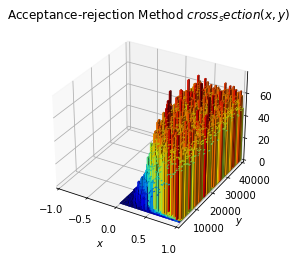

Acceptance-rejection method nPoints=100000, nFunctionEval=254616, maxWeightEncounteredRej=1.156194143185596e+16, F_VAL_MAX=346157184117975.4


In [28]:
def plot_results(
    nPoints,
    vegasRatioFactor,
    nBins=50,
    NN=100,
    KK=2000,
    nIterations=4000,
    alpha_damp=1.5,
    seed=None,
):
    bf = brute_force(nPoints, seed)
#     vg = vegas(nPoints, vegasRatioFactor, NN, KK, nIterations, alpha_damp, seed)
    # brute force
    titleRej = r"Acceptance-rejection Method $cross_section(x,y)$"
    lego_plot(bf["yy1"], bf["yy2"], nBins, "$x$", "$y$", titleRej)
    plt.show()

#     # Vegas method
#     titleVrho = r"Vegas Method $p(x,y)$"
#     lego_plot(vg["yy1vrho"], vg["yy2vrho"], nBins, "$x$", "$y$", titleVrho)
#     plt.show()

#     titleVegas = r"Vegas Method $f(x,y)$"
#     lego_plot(vg["yy1vegas"], vg["yy2vegas"], nBins, "$x$", "$y$", titleVegas)
#     plt.show()

    print(
        f"Acceptance-rejection method nPoints={nPoints}, nFunctionEval={bf['nFunEval']}, maxWeightEncounteredRej={bf['maxWeightEncountered']}, F_VAL_MAX={F_VAL_MAX}"
    )
#     print(
#         f"Vegas method nPoints={nPoints}, nFunctionEval={vg['nFunEval']}, maxWeightEncountered={vg['maxWeightEncountered']}, vegasRatioMax={vg['vegasRatioMax']}, vegasRatioFactor={vegasRatioFactor}"
#     )


plot_results(100_000, 10) # changed 0.1 to 0.5 (vegas ratio factor)
# vegas ratio factor is the ratio of the function youre trying to evaluate divided by the prob dist